# Data preprocessing and split

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import optimizers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

print(tf.__version__)

2.13.0


In [2]:
data = pd.read_csv('/Users/ujong-yun/Documents/학부연구생/학부연구생 - dataset 공유 (csv).csv')
data.dropna()
regression_data = data.loc[data['Knocking'] == 0]
regression_data

,Case,Engine Speed,Spark Timing,Throttle Angle,Ambient Temperature,Intake Pressure,Intake Temperature,Exhaust Pressure,Exhaust Temperature,Injected Mass,Maximum Pressure,Crank Angle at Maximum Pressure,Maximum Rate of Pressure Rise,BMEP,IMEP,BSFC,BSNOx,BSCO,Knocking Index,Knocking
547,546.0,2000,-10,30,283,0.975,288.8,1.069,858.7,36.89,39.8,27.96,1.33,8.67,10.1,307.4,2.91,222.7,0.0,0.0
548,547.0,2000,-10,30,293,0.974,295.5,1.068,858.6,36.61,39.5,27.48,1.32,8.6,9.98,307.2,2.99,220.9,0.0,0.0
549,548.0,2000,-10,30,303,0.974,302.3,1.067,858.1,36.35,39.2,27.62,1.31,8.53,9.86,307.5,3.03,221.4,0.0,0.0
550,549.0,2000,-10,35,283,0.982,288.8,1.07,861.2,37.35,40.9,27.25,1.39,8.82,10.31,304.4,3.23,215.2,0.0,0.0
551,550.0,2000,-10,35,293,0.982,295.6,1.069,858.9,37.1,40.6,27.41,1.39,8.75,10.19,306.1,3.09,221.4,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2141,2140.0,6000,-10,85,293,0.969,294.1,1.493,1088.4,48.07,33.1,36.97,0.78,8.13,10.29,426,1.73,403,0.0,0.0
2142,2141.0,6000,-10,85,303,0.969,301.6,1.488,1089.5,47.74,33.3,36.99,0.78,8.08,10.27,425.9,1.81,402.8,0.0,0.0
2143,2142.0,6000,-10,90,283,0.97,286.6,1.498,1088.9,48.4,32.9,37.96,0.78,8.2,10.31,424.8,1.72,399.2,0.0,0.0
2144,2143.0,6000,-10,90,293,0.969,294.1,1.493,1088.5,48.08,33.1,36.97,0.78,8.14,10.29,425.9,1.74,402.7,0.0,0.0


In [3]:
regression_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1064 entries, 547 to 2145
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Case                             1064 non-null   float64
 1   Engine Speed                     1064 non-null   object 
 2   Spark Timing                     1064 non-null   object 
 3   Throttle Angle                   1064 non-null   object 
 4   Ambient Temperature              1064 non-null   object 
 5   Intake Pressure                  1064 non-null   object 
 6   Intake Temperature               1064 non-null   object 
 7   Exhaust Pressure                 1064 non-null   object 
 8   Exhaust Temperature              1064 non-null   object 
 9   Injected Mass                    1064 non-null   object 
 10  Maximum Pressure                 1064 non-null   object 
 11  Crank Angle at Maximum Pressure  1064 non-null   object 
 12  Maximum Rate of Pressur

In [4]:
input_data = regression_data.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8, 9]]
input_data
input_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1064 entries, 547 to 2145
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Engine Speed         1064 non-null   object
 1   Spark Timing         1064 non-null   object
 2   Throttle Angle       1064 non-null   object
 3   Ambient Temperature  1064 non-null   object
 4   Intake Pressure      1064 non-null   object
 5   Intake Temperature   1064 non-null   object
 6   Exhaust Pressure     1064 non-null   object
 7   Exhaust Temperature  1064 non-null   object
 8   Injected Mass        1064 non-null   object
dtypes: object(9)
memory usage: 83.1+ KB


In [5]:
output_data = regression_data.iloc[:, [10, 11, 12, 13, 14, 15, 16, 17]]
output_data
output_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1064 entries, 547 to 2145
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Maximum Pressure                 1064 non-null   object
 1   Crank Angle at Maximum Pressure  1064 non-null   object
 2   Maximum Rate of Pressure Rise    1064 non-null   object
 3   BMEP                             1064 non-null   object
 4   IMEP                             1064 non-null   object
 5   BSFC                             1064 non-null   object
 6   BSNOx                            1064 non-null   object
 7   BSCO                             1064 non-null   object
dtypes: object(8)
memory usage: 74.8+ KB


In [6]:
input_data=input_data.astype('float')
output_data = output_data.astype('float')
input_data.info()
output_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1064 entries, 547 to 2145
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Engine Speed         1064 non-null   float64
 1   Spark Timing         1064 non-null   float64
 2   Throttle Angle       1064 non-null   float64
 3   Ambient Temperature  1064 non-null   float64
 4   Intake Pressure      1064 non-null   float64
 5   Intake Temperature   1064 non-null   float64
 6   Exhaust Pressure     1064 non-null   float64
 7   Exhaust Temperature  1064 non-null   float64
 8   Injected Mass        1064 non-null   float64
dtypes: float64(9)
memory usage: 83.1 KB
<class 'pandas.core.frame.DataFrame'>
Index: 1064 entries, 547 to 2145
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Maximum Pressure                 1064 non-null   float64
 1   Crank Angle 

In [7]:
train_input, test_input, train_output, test_output = train_test_split(input_data, output_data, test_size=0.2, shuffle = True, random_state=42)
train_input, val_input, train_output, val_output = train_test_split(train_input, train_output, test_size = 0.25, shuffle=True, random_state=42)
print(train_input.shape, train_output.shape)
print(val_input.shape, val_output.shape)
print(test_input.shape, test_output.shape)


(638, 9) (638, 8)
(213, 9) (213, 8)
(213, 9) (213, 8)


In [8]:
print(test_output.index)

Index([ 578, 2135, 1282, 1743, 1854, 1499, 1510, 1522,  746, 1280,
       ...
       1465, 1993, 2019, 1216,  766, 1512,  715,  780, 2087,  572],
      dtype='int64', length=213)


In [9]:
ss = StandardScaler()
ss.fit(train_input)
train_scale = ss.transform(train_input)
val_scale =  ss.transform(val_input)
test_scale =  ss.transform(test_input)

# DNN Model

In [10]:
model = keras.Sequential()
model.add(keras.layers.Dense(256, activation='relu', input_shape = (9, )))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(32, activation= 'relu'))
model.add(keras.layers.Dense(16, activation= 'relu'))
model.add(keras.layers.Dense(8))
model.summary()

2024-03-10 16:36:39.873238: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-03-10 16:36:39.873263: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-03-10 16:36:39.873269: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-03-10 16:36:39.873689: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-10 16:36:39.873724: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2560      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 8)                 136       
                                                                 
Total params: 46456 (181.47 KB)
Trainable params: 46456 

In [11]:
#initial_learning_rate = 0.01
#lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    #initial_learning_rate,
    #decay_steps=100000,
    #decay_rate=0.96,
    #staircase=True)

In [12]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('best-multiregression-model.h5')
callback = keras.callbacks.EarlyStopping(monitor = 'loss', patience=10, verbose=True)
model.compile(tf.keras.optimizers.legacy.Adam(learning_rate=0.001), loss = 'mse', metrics=['mae', 'mse'])
history = model.fit(train_scale, train_output, validation_data=(val_scale, val_output) ,epochs=1000, callbacks=[callback])

Epoch 1/1000


2024-03-10 16:36:41.476080: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


20/20 [==============================] - 5s 89ms/step - loss: 25309.5645 - mae: 90.3161 - mse: 25309.5645 - val_loss: 24788.0332 - val_mae: 90.2585 - val_mse: 24788.0332
Epoch 2/1000
 1/20 [>.............................] - ETA: 0s - loss: 25551.8926 - mae: 90.8383 - mse: 25551.8926

2024-03-10 16:36:46.355346: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


20/20 [==============================] - 0s 17ms/step - loss: 25316.1074 - mae: 92.5104 - mse: 25316.1074 - val_loss: 24468.0078 - val_mae: 92.9859 - val_mse: 24468.0078
Epoch 3/1000
20/20 [==============================] - 0s 17ms/step - loss: 29914.2949 - mae: 106.6990 - mse: 29914.2949 - val_loss: 31266.7578 - val_mae: 112.3871 - val_mse: 31266.7578
Epoch 4/1000
20/20 [==============================] - 0s 16ms/step - loss: 38527.8945 - mae: 117.0271 - mse: 38527.8945 - val_loss: 29177.3008 - val_mae: 96.5652 - val_mse: 29177.3008
Epoch 5/1000
20/20 [==============================] - 0s 15ms/step - loss: 33219.0000 - mae: 97.4695 - mse: 33219.0000 - val_loss: 21693.4863 - val_mae: 78.9526 - val_mse: 21693.4863
Epoch 6/1000
20/20 [==============================] - 0s 21ms/step - loss: 26511.2031 - mae: 92.8015 - mse: 26511.2031 - val_loss: 24502.8691 - val_mae: 84.4367 - val_mse: 24502.8691
Epoch 7/1000
20/20 [==============================] - 0s 15ms/step - loss: 30893.7344 - mae: 10

In [13]:
model.save('best-multiregression-model.h5')
model = keras.models.load_model('best-multiregression-model.h5')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [14]:
hist = history.history
hist['epochs'] = history.epoch
epochs = hist['epochs']
loss = hist['loss']
val_loss = hist['val_loss']
mae = hist['mae']
val_mae = hist['val_mae']
mse = hist['mse']
val_mse = hist['mse']
def plot_history(history):

    fig, axes = plt.subplots(1, 3, constrained_layout = True, figsize = (10, 5))
    axes[0].plot(epochs, loss, label = 'Training_loss')
    axes[0].plot(epochs, val_loss, label = 'val_loss')
    axes[1].plot(epochs, mae, label = 'Training_mae')
    axes[1].plot(epochs, val_mae, label = 'val_mae')
    axes[2].plot(epochs, mse, label = 'Training_mse')
    axes[2].plot(epochs, val_mse, label = 'val_mse')
    axes[0].set_title('Training and validation loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[1].set_title('Training and validation mae')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('MAE')
    axes[2].set_title('Training and validation mse')
    axes[2].set_xlabel('Epochs')
    axes[2].set_ylabel('MSE')
    axes[0].legend()
    axes[1].legend()
    axes[2].legend()
    plt.show()
    


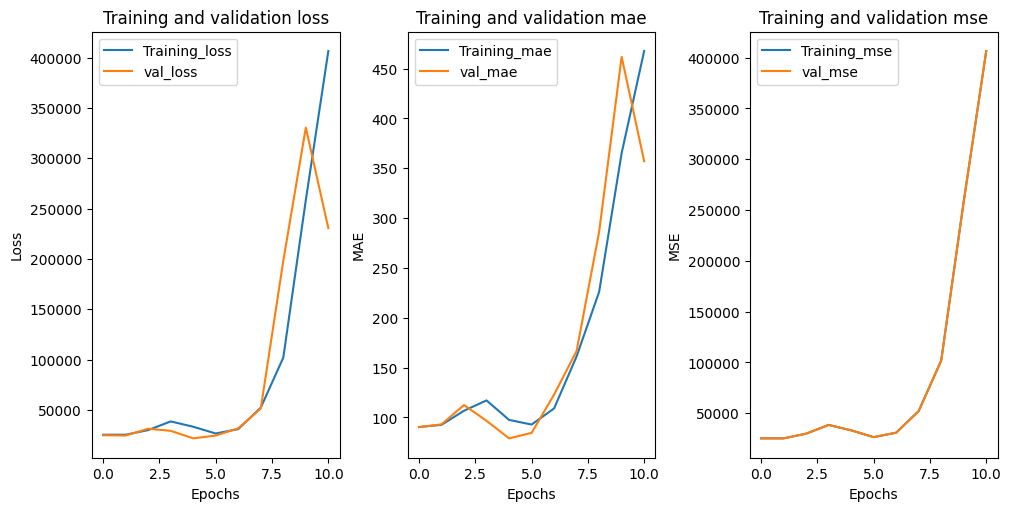

In [15]:
plot_history(history)

In [16]:
loss_mae_mse_df = pd.DataFrame(((loss[i], val_loss[i], mae[i], val_mae[i],  mse[i], val_mse[i]) for i in range(len(history.epoch))), columns=['Loss', 'Val_Loss', 'MAE', 'Val_MAE', 'MSE', 'Val_MSE'])
loss_mae_mse_df

,Loss,Val_Loss,MAE,Val_MAE,MSE,Val_MSE
0,25309.564453,24788.033203,90.316086,90.258545,25309.564453,25309.564453
1,25316.107422,24468.007812,92.510399,92.985863,25316.107422,25316.107422
2,29914.294922,31266.757812,106.699036,112.387131,29914.294922,29914.294922
3,38527.894531,29177.300781,117.027084,96.565163,38527.894531,38527.894531
4,33219.000000,21693.486328,97.469521,78.952591,33219.000000,33219.000000
5,26511.203125,24502.869141,92.801476,84.436653,26511.203125,26511.203125
6,30893.734375,31661.171875,108.996979,122.896713,30893.734375,30893.734375
7,52206.769531,51357.003906,161.232422,166.633392,52206.769531,52206.769531
8,101917.015625,198160.593750,225.970688,286.248291,101917.015625,101917.015625
9,258409.906250,330398.125000,365.282104,461.852295,258409.906250,258409.906250


In [17]:
loss_mae_mse_df.to_csv('Loss_Mae_Mse_df.csv', index = True)

In [18]:
model.evaluate(test_scale, test_output)
model.evaluate(train_scale, train_output)
model.evaluate(val_scale, val_output)

7/7 [==============================] - 0s 11ms/step - loss: 250555.2656 - mae: 373.2994 - mse: 250555.2656


2024-03-10 16:36:50.675645: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 6ms/step - loss: 230537.2344 - mae: 357.0327 - mse: 230537.2344


[230537.234375, 357.03265380859375, 230537.234375]

In [19]:
predicted_test = model.predict(test_scale)
predicted_train = model.predict(train_scale)
predicted_val = model.predict(val_scale)

2024-03-10 16:36:51.234223: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 3ms/step


In [20]:
predicted_test_df = pd.DataFrame(predicted_test)
predicted_train_df = pd.DataFrame(predicted_train)
predicted_val_df = pd.DataFrame(predicted_val)

In [21]:
predicted_test_df.columns = ['Maximum Pressure(predicted)', 'Crank Angle at Maximum Pressure(predicted)', 'Maximum Rate of Pressure Rise(predicted)', 'BMEP(predicted)',
                         'IMEP(predicted)', 'BSFC(predicted)', 'BSNOx(predicted)', 'BSCO(predicted)']
predicted_train_df.columns = ['Maximum Pressure(predicted)', 'Crank Angle at Maximum Pressure(predicted)', 'Maximum Rate of Pressure Rise(predicted)', 'BMEP(predicted)',
                         'IMEP(predicted)', 'BSFC(predicted)', 'BSNOx(predicted)', 'BSCO(predicted)']
predicted_val_df.columns = ['Maximum Pressure(predicted)', 'Crank Angle at Maximum Pressure(predicted)', 'Maximum Rate of Pressure Rise(predicted)', 'BMEP(predicted)',
                         'IMEP(predicted)', 'BSFC(predicted)', 'BSNOx(predicted)', 'BSCO(predicted)']

In [22]:
predicted_test_df.index = test_output.index
predicted_train_df.index = train_output.index
predicted_val_df.index = val_output.index

In [23]:
def DataFrame(predicted_df, df_outuput, output_df):
   for i in range(8):
      predicted_df.insert(2*i+1, df_outuput.columns[i], output_df.iloc[:, [i]])
   predicted_df

In [24]:
DataFrame(predicted_test_df, test_output, test_output)


In [25]:
DataFrame(predicted_train_df, train_output, train_output)

In [26]:
DataFrame(predicted_val_df, val_output, val_output)

In [27]:
predicted_test_df.to_csv("Predicted_result.csv")

In [28]:
predicted_train_df.to_csv("Predicted_train_result.csv")

In [29]:
predicted_val_df.to_csv("Predicted_val_result.csv")

In [30]:
#R2_score
def R2_score(predicted_true):
    list = []
    metrics = tf.keras.metrics.R2Score()
    for i in range(8):
        metrics.update_state(predicted_true.iloc[:, [2*i+1]], predicted_true.iloc[:, [2*i]])
        result = metrics.result()
        list.append(result.numpy())

    return list

In [31]:
print(R2_score(predicted_test_df))
print(R2_score(predicted_train_df))
print(R2_score(predicted_val_df))

[-514.6242, -390.3335, -225.1797, -347.14117, -834.274, -17.931288, -17.20013, -14.394071]
[-441.6534, -402.44122, -242.19539, -375.07553, -903.5772, -19.209743, -18.442263, -14.88106]
[-375.4008, -288.52243, -188.10333, -295.14957, -714.5255, -16.823757, -16.132002, -12.616869]


In [32]:
R2_score_df = pd.DataFrame((R2_score(predicted_test_df), R2_score(predicted_train_df), R2_score(predicted_val_df)), columns = ['Maximum Pressure', 'Crank Angle at Maximum Pressure', 'Maximum Rate of Pressure Rise', 'BMEP','IMEP', 'BSFC', 'BSNOx', 'BSCO'], index = ['Test', 'Train', 'Validation'])
R2_score_df

,Maximum Pressure,Crank Angle at Maximum Pressure,Maximum Rate of Pressure Rise,BMEP,IMEP,BSFC,BSNOx,BSCO
Test,-514.624207,-390.333496,-225.179703,-347.141174,-834.273987,-17.931288,-17.200130,-14.394071
Train,-441.653412,-402.441223,-242.195389,-375.075531,-903.577209,-19.209743,-18.442263,-14.881060
Validation,-375.400787,-288.522430,-188.103333,-295.149567,-714.525513,-16.823757,-16.132002,-12.616869


In [33]:
R2_score_df.to_csv('R2_score.csv')

In [34]:
from sklearn.model_selection import ParameterGrid

# 하이퍼파라미터 그리드 정의
param_grid = {
    'dropout_rate': [0.1 ,0.2, 0.3,],
    'learning_rate': [0.001, 0.01, 0.1],
    'hidden_layers': [1, 2, 3],
    'hidden_units': [128, 64, 32]
}

# 하이퍼파라미터 그리드를 순회하며 그리드 서치 실행
best_mae = float('inf')
best_params = {}

for params in ParameterGrid(param_grid):
    print("Training with parameters:", params)
    
    # 모델 생성
    model = keras.Sequential()
    model.add(keras.layers.Dense(params['hidden_units'], activation='relu', input_shape=(9, )))
    model.add(keras.layers.Dropout(rate=params['dropout_rate']))
    
    for _ in range(params['hidden_layers']):
        model.add(keras.layers.Dense(params['hidden_units'], activation='relu'))
        model.add(keras.layers.Dropout(rate=params['dropout_rate']))
    
    model.add(keras.layers.Dense(8))
    
    # 모델 컴파일
    optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=params['learning_rate'])
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae', 'mse'])
    
    # 모델 훈련
    history = model.fit(train_scale, train_output, validation_data=(val_scale, val_output), epochs=1000, callbacks=[callback, checkpoint_cb], verbose=0)
    
    # 검증 세트에 대한 평가
    val_mae = model.evaluate(val_scale, val_output, verbose=0)[1]
    print("Validation MAE:", val_mae)
    
    # 최적의 하이퍼파라미터와 MAE 업데이트
    if val_mae < best_mae:
        best_mae = val_mae
        best_params = params
    model.save_weights('best-multiregression-hyperparameters.h5')
print("Best parameters:", best_params)
print("Best validation MAE:", best_mae)


Training with parameters: {'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 128, 'learning_rate': 0.001}


2024-03-10 16:36:53.365228: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-10 16:36:54.455757: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


KeyboardInterrupt: 